# Lecture02

## Logistic regression with regularization

### CIS432 Machine Learning for Business Analytics


In [ ]:
# Load data, train, and evaluate a logistic regression model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

fico_binarized_url = 'https://drive.google.com/uc?id=1HA4e-o_bfKFvreiprpIwO_y-gJNPOWTl&export=download'
fico = pd.read_csv(fico_binarized_url)
X = fico.iloc[:,:-1]
y = (fico.iloc[:,-1]=='Bad').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(X_train.shape, X_validation.shape, X_test.shape)

fico_logistic = LogisticRegression(random_state=0, C=10**10, solver='liblinear').fit(X_train, y_train)
accuracy_fico_logistic = accuracy_score(y_validation, fico_logistic.predict(X_validation))
print('Model accuracy', accuracy_fico_logistic)

(5922, 109) (1974, 109) (1975, 109)
Model accuracy 0.7522796352583586


In [ ]:
# Logistic regression is a linear model, we can examine its coefficients
beta0, beta = fico_logistic.intercept_, fico_logistic.coef_[0]
print('beta_0:', beta0, 'beta:', beta)

beta_0: [-0.14124383] beta: [ 0.18693206  0.29375392  0.27333508  0.16089041  0.24373693 -0.32817589
  0.11324569 -0.02190159  0.20168813  0.14233312 -0.25448952  0.20051639
 -0.14124383  0.37371594  0.3028398   0.22930321 -0.14124383  0.68672418
  0.33331766  0.17638912  0.20204149 -0.14124383 -0.14124383 -0.03584372
 -0.28380932  3.78312502  2.44127319 -0.14124383  0.20440627  0.21931668
 -0.31674137 -0.19109775  0.09151899  0.07787253 -0.01250088 -0.10703672
 -0.14124383  0.080418   -0.11260676  0.08902823  6.35534373  0.03464546
  0.36859662 -0.00807135  0.28491028 -0.14124383  0.02150726  0.09844009
  0.18710873  0.06092972  0.17738752 -0.26119118  0.16992628  0.1795103
 -0.14124383  0.04626115 -0.14124383 -0.35338549 -0.27608053  0.04369389
  0.15007055  0.29445774 -0.10494794 -0.03629589 -0.15914376  0.10508522
  0.44936915  0.24800678  0.26994197  0.22312999 -1.58654699  0.25485528
  1.05369071 -0.18072112  0.39513056  0.33942215 -0.14544143  1.49003775
 -1.01421341 -0.14124383

In [ ]:
# Train regularized models
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

exp_lb1, exp_ub1, num_values1 = -2, 2, 30
Cs = np.geomspace(10**exp_lb1, 10**exp_ub1, num_values1)
fico_logistic1 = LogisticRegressionCV(Cs=Cs, cv=5, random_state=0, penalty='l1', solver='liblinear').fit(X_train, y_train)
means1 = fico_logistic1.scores_[1].mean(axis=0)
stds1 = fico_logistic1.scores_[1].std(axis=0)
best1 = accuracy_score(y_validation, fico_logistic1.predict(X_validation))

exp_lb2, exp_ub2, num_values2 = -2, 2, 30
Cs = np.geomspace(10**exp_lb2, 10**exp_ub2, num_values2)
fico_logistic2 = LogisticRegressionCV(Cs=Cs, cv=5, random_state=0, penalty='l2', solver='liblinear').fit(X_train, y_train)
means2 = fico_logistic2.scores_[1].mean(axis=0)
stds2 = fico_logistic2.scores_[1].std(axis=0)
best2 = accuracy_score(y_validation, fico_logistic2.predict(X_validation))

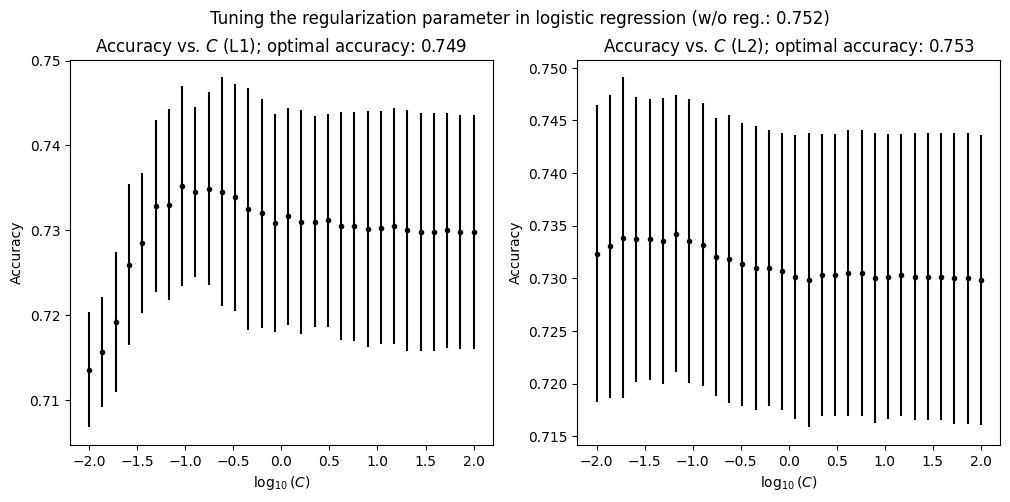

In [ ]:
# visualize results (tuning)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].errorbar(np.linspace(exp_lb1,exp_ub1,num_values2), means1, yerr=stds1, fmt='.k');
axes[0].set_xlabel(r'$\log_{10}(C)$'); axes[0].set_ylabel('Accuracy'); axes[0].set_title(r'Accuracy vs. $C$ (L1); optimal accuracy: %.3f'%best1);
axes[1].errorbar(np.linspace(exp_lb2,exp_ub1,num_values2), means2, yerr=stds2, fmt='.k');
axes[1].set_xlabel(r'$\log_{10}(C)$'); axes[1].set_ylabel('Accuracy'); axes[1].set_title(r'Accuracy vs. $C$ (L2); optimal accuracy: %.3f'%best2);
fig.suptitle('Tuning the regularization parameter in logistic regression (w/o reg.: %.3f)'%accuracy_fico_logistic);

* In this particular example there is no performance gain from using regularization

# coefficients equal to 0:
 LR        0
LR L1    57
LR L2     0
dtype: int64
# coefficients smaller than 0.01:
 LR        1
LR L1    59
LR L2     4
dtype: int64


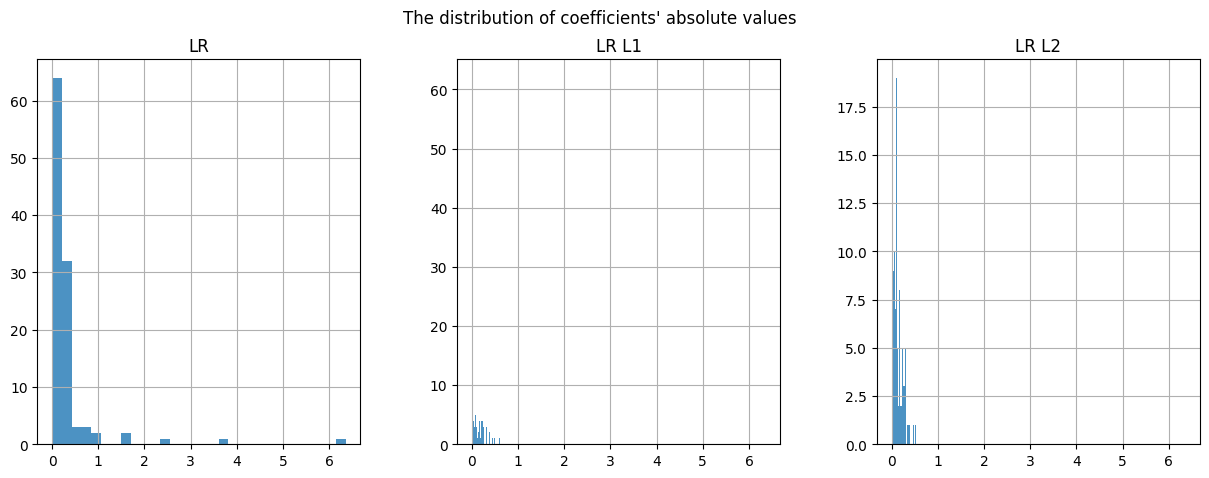

In [ ]:
# Visualize the distribution of coefficients' absolute values
models = pd.DataFrame({'LR':np.abs(fico_logistic.coef_[0]), 'LR L1':np.abs(fico_logistic1.coef_[0]), 'LR L2':np.abs(fico_logistic2.coef_[0])})
models.hist(bins=30, alpha=0.8, sharex=True, figsize=(15,5),layout=(1,3));
plt.gcf().suptitle('The distribution of coefficients\' absolute values')
print('# coefficients equal to 0:\n', (models==0).sum())
print('# coefficients smaller than 0.01:\n', (models<0.01).sum())

Observations:
* The coefficients are smaller with regularization
* L1 achieves significantly more sparse model

Return to the presentation